In [1]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:

file_dir = "/Users/bhupendra/projects/crocus/data/flux_data/data/netcdf/resnc/"
file_list = [os.path.join(root, f) for root, _, files in os.walk(file_dir) for f in files if f.endswith('.nc')]

In [3]:
ds = xr.open_mfdataset(file_list)
ds

<xarray.Dataset> Size: 16MB
Dimensions:                        (time: 15004)
Coordinates:
  * time                           (time) datetime64[ns] 120kB 2024-07-01T00:...
Data variables: (12/115)
    filename                       (time) <U34 2MB dask.array<chunksize=(48,), meta=np.ndarray>
    DOY                            (time) float64 120kB dask.array<chunksize=(48,), meta=np.ndarray>
    daytime                        (time) int64 120kB dask.array<chunksize=(48,), meta=np.ndarray>
    file_records                   (time) int64 120kB dask.array<chunksize=(48,), meta=np.ndarray>
    used_records                   (time) int64 120kB dask.array<chunksize=(48,), meta=np.ndarray>
    Tau                            (time) float64 120kB dask.array<chunksize=(48,), meta=np.ndarray>
    ...                             ...
    w_per_h2o_cov                  (time) float64 120kB dask.array<chunksize=(48,), meta=np.ndarray>
    vin_sf_mean                    (time) float64 120kB dask.array<chunksize=(48,), meta=np.ndarray>
    co2_mean                       (time) float64 120kB dask.array<chunksize=(48,), meta=np.ndarray>
    h2o_mean                       (time) float64 120kB dask.array<chunksize=(48,), meta=np.ndarray>
    dew_point_mean                 (time) float64 120kB dask.array<chunksize=(48,), meta=np.ndarray>
    co2_signal_strength_7500_mean  (time) float64 120kB dask.array<chunksize=(48,), meta=np.ndarray>
Attributes: (12/27)
    site_name:              UIC
    altitude:               178.5
    latitude:               41.86945343
    longitude:              -87.64586639
    station_name:           CROCUS
    logger_id:              smart3-00694
    ...                     ...
    funding_source:         U.S. DOE Office of Science, Biological and Enviro...
    acknowledgment:         This material is based upon work supported by the...
    file_creation_date:     2024-11-04
    data_version:           v1.0.0
    file_version:           2024.11.04
    doi:                    10.15485/2473253

Select the variables of interest

In [4]:
# Expand df to include all flux variables of interest
df = ds[[
    'LE',
    'qc_LE',
    'H',
    'qc_H',
    'co2_flux',
    'h2o_flux',
    'qc_co2_flux',
    'h2o_mixing_ratio',
    'air_temperature',
    'daytime',
    'DOY'
]].to_dataframe().reset_index()

# Add derived columns
df['hour'] = df['time'].dt.hour
df['date'] = df['time'].dt.date
df['month'] = df['time'].dt.month
df['weekday'] = df['time'].dt.weekday  # 0 = Monday, 6 = Sunday
df['is_weekend'] = df['weekday'] >= 5
df['is_djf'] = df['month'].isin([12, 1, 2])


<>:18: SyntaxWarning: invalid escape sequence '\m'
<>:18: SyntaxWarning: invalid escape sequence '\m'
/var/folders/c0/hb5cyy892hqdjht868lw3qk80000gp/T/ipykernel_27637/770817171.py:18: SyntaxWarning: invalid escape sequence '\m'
  axes[0].set_title(f'a. $\mathrm{H_2O}$ Mixing Ratio Distribution')
/var/folders/c0/hb5cyy892hqdjht868lw3qk80000gp/T/ipykernel_27637/770817171.py:18: SyntaxWarning: invalid escape sequence '\m'
  axes[0].set_title(f'a. $\mathrm{H_2O}$ Mixing Ratio Distribution')


NameError: name 'H_2O' is not defined

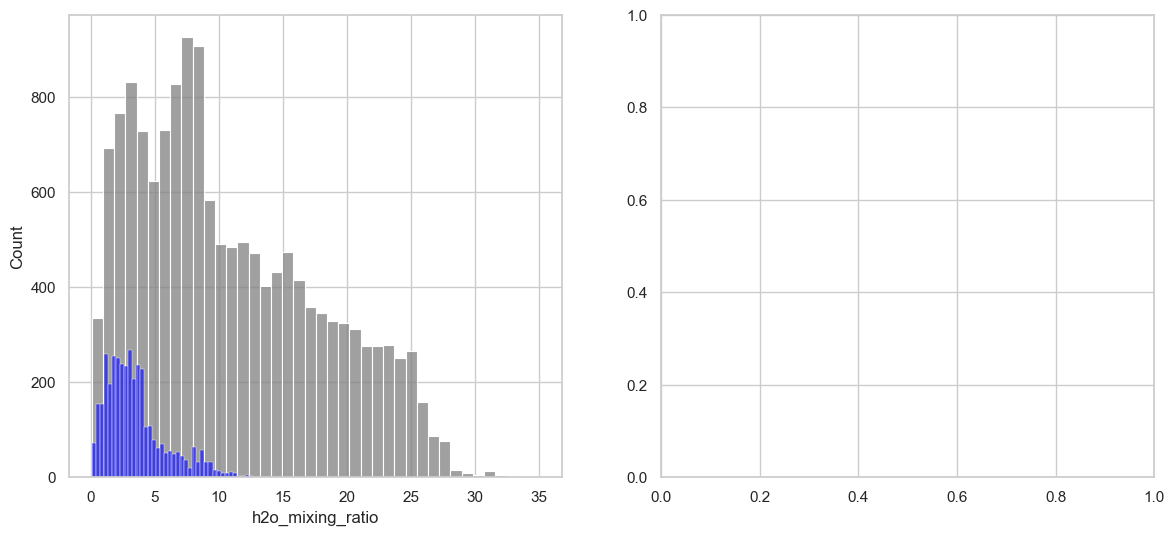

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extract units from dataset metadata
units = {
    'h2o_mixing_ratio': ds['h2o_mixing_ratio'].attrs.get('units', 'unknown'),
    'air_temperature': ds['air_temperature'].attrs.get('units', 'unknown')
}

# Set seaborn style
sns.set(style="whitegrid")

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# a. H2O mixing ratio
sns.histplot(df['h2o_mixing_ratio'], bins=40, kde=False, color='gray', label='All Months', ax=axes[0])
sns.histplot(df[df['is_djf']]['h2o_mixing_ratio'], bins=40, kde=False, color='blue', label='DJF Only', ax=axes[0], alpha=0.6)
axes[0].set_title(f'a. $\mathrm{H_2O}$ Mixing Ratio Distribution')
axes[0].set_xlabel(f'H₂O Mixing Ratio ({units["h2o_mixing_ratio"]})')
axes[0].set_ylabel('Frequency')
axes[0].legend()

# b. Air temperature
sns.histplot(df['air_temperature'], bins=40, kde=False, color='gray', label='All Months', ax=axes[1])
sns.histplot(df[df['is_djf']]['air_temperature'], bins=40, kde=False, color='blue', label='DJF Only', ax=axes[1], alpha=0.6)
axes[1].set_title(f'b. Air Temperature Distribution')
axes[1].set_xlabel(f'Air Temperature ({units["air_temperature"]})')
axes[1].set_ylabel('Frequency')
axes[1].legend()

plt.tight_layout()
plt.show()


Mixing ratios (r, moles of gas per mole of dry air) and air temperature (K) are lower for winter months as expected.
We can use the threshold of 5 for mixing ratio to separate the data.

/var/folders/c0/hb5cyy892hqdjht868lw3qk80000gp/T/ipykernel_56292/3055884920.py:48: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from current font.
  plt.tight_layout()
/Users/bhupendra/anaconda3/envs/data/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


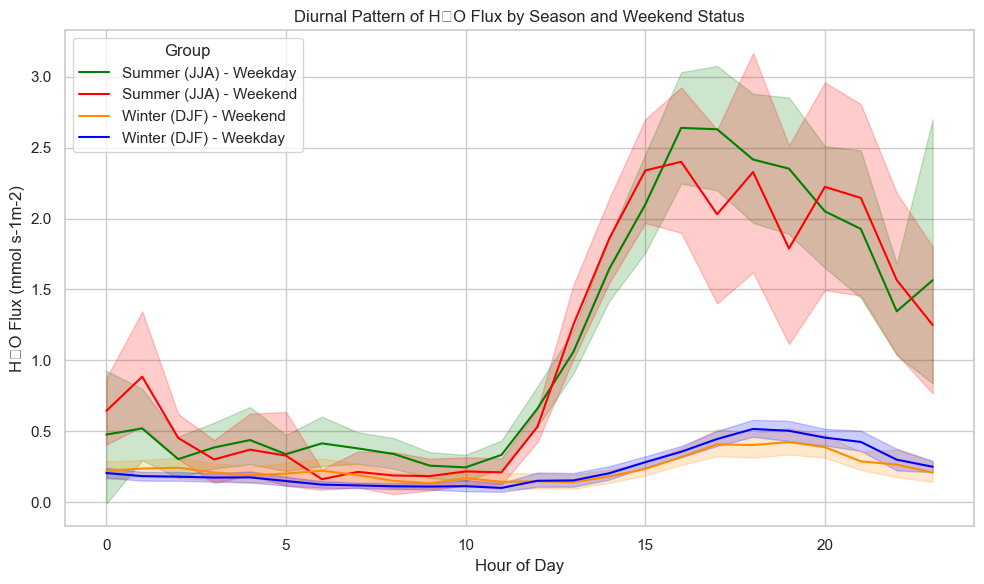

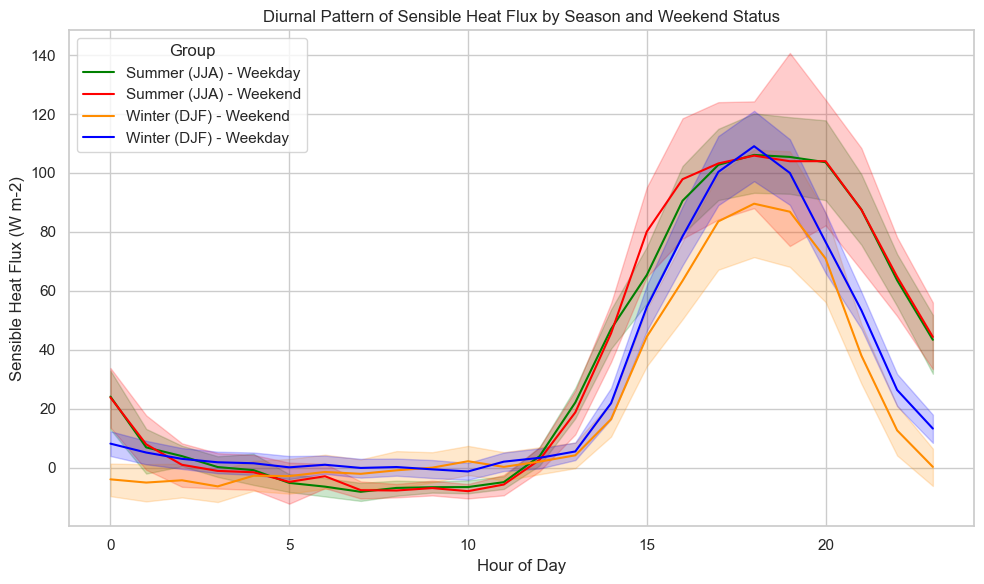

/var/folders/c0/hb5cyy892hqdjht868lw3qk80000gp/T/ipykernel_56292/3055884920.py:48: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from current font.
  plt.tight_layout()
/Users/bhupendra/anaconda3/envs/data/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


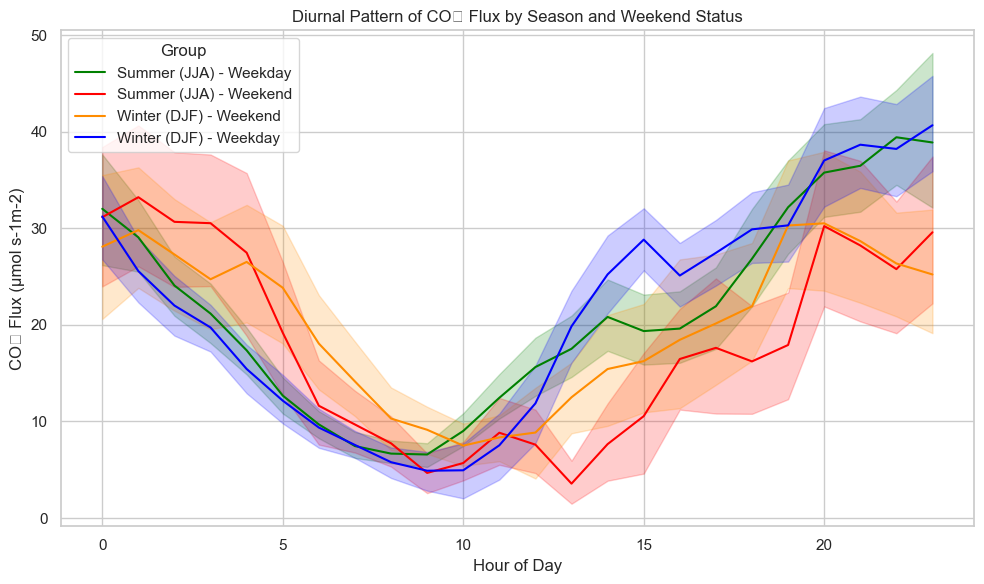

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define seasons and combined group
df['season'] = 'Other'
df.loc[df['month'].isin([12, 1, 2]), 'season'] = 'Winter (DJF)'
df.loc[df['month'].isin([6, 7, 8]), 'season'] = 'Summer (JJA)'

# Define combined group for hue
df['group'] = df['season'] + ' - ' + df['is_weekend'].map({False: 'Weekday', True: 'Weekend'})

# Variables to analyze
flux_vars = ['h2o_flux', 'H', 'co2_flux']
titles = {
    'h2o_flux': 'H₂O Flux',
    'H': 'Sensible Heat Flux',
    'co2_flux': 'CO₂ Flux'
}
units = {
    'h2o_flux': ds['h2o_flux'].attrs.get('units', ''),
    'H': ds['H'].attrs.get('units', ''),
    'co2_flux': ds['co2_flux'].attrs.get('units', '')
}

# Define a color palette with unique colors per group
palette = {
    'Winter (DJF) - Weekday': 'blue',
    'Winter (DJF) - Weekend': 'darkorange',
    'Summer (JJA) - Weekday': 'green',
    'Summer (JJA) - Weekend': 'red'
}

# Plot each variable
for var in flux_vars:
    plt.figure(figsize=(10, 6))
    sns.lineplot(
        data=df[df['season'].isin(['Winter (DJF)', 'Summer (JJA)'])],
        x='hour',
        y=var,
        hue='group',
        errorbar='ci',
        palette=palette
    )
    plt.title(f'Diurnal Pattern of {titles[var]} by Season and Weekend Status')
    plt.xlabel('Hour of Day')
    plt.ylabel(f'{titles[var]} ({units[var]})')
    plt.grid(True)
    plt.tight_layout()
    plt.legend(title='Group')
    plt.show()


In [ ]:
# Custom pastel red and blue (can override Seaborn pastel if needed)
color_palette = {
    'Weekday': '#D81B60',  # pastel blue
    'Weekend': '#004D40'   # pastel red
}

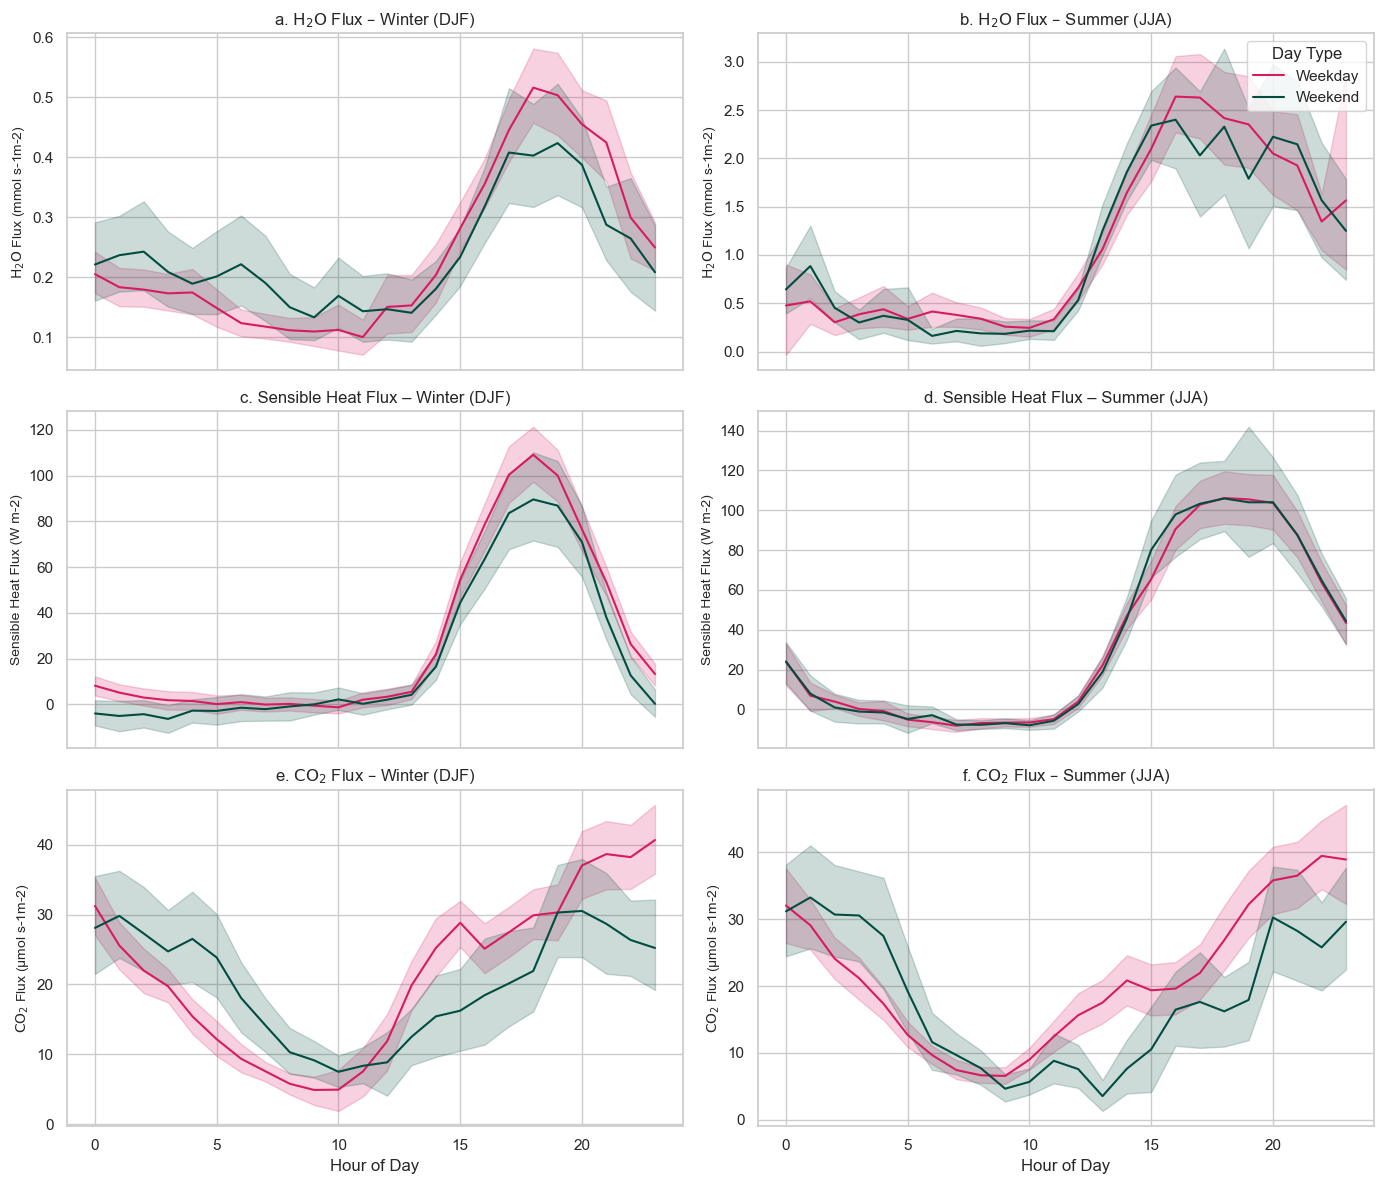

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure consistent metadata
df['season'] = 'Other'
df.loc[df['month'].isin([12, 1, 2]), 'season'] = 'Winter (DJF)'
df.loc[df['month'].isin([6, 7, 8]), 'season'] = 'Summer (JJA)'
df['day_type'] = df['is_weekend'].map({False: 'Weekday', True: 'Weekend'})

# Variables and LaTeX titles
flux_vars = ['h2o_flux', 'H', 'co2_flux']
titles = {
    'h2o_flux': r'$\mathrm{H_2O}$ Flux',
    'H': 'Sensible Heat Flux',
    'co2_flux': r'$\mathrm{CO_2}$ Flux'
}
units = {
    'h2o_flux': ds['h2o_flux'].attrs.get('units', ''),
    'H': ds['H'].attrs.get('units', ''),
    'co2_flux': ds['co2_flux'].attrs.get('units', '')
}

# Panel setup
fig, axes = plt.subplots(nrows=len(flux_vars), ncols=2, figsize=(14, 12), sharex=True)
panel_labels = ['a.', 'b.', 'c.', 'd.', 'e.', 'f.']

# Plot loop
for row_idx, var in enumerate(flux_vars):
    for col_idx, season in enumerate(['Winter (DJF)', 'Summer (JJA)']):
        ax = axes[row_idx, col_idx]
        subset = df[df['season'] == season]
        
        for day_type, group_df in subset.groupby('day_type'):
            sns.lineplot(
                data=group_df,
                x='hour',
                y=var,
                errorbar='ci',
                ax=ax,
                label=day_type,
                color=color_palette[day_type]
            )
        
        panel_idx = row_idx * 2 + col_idx
        ax.set_title(f"{panel_labels[panel_idx]} {titles[var]} – {season}", fontsize=12)
        ax.set_xlabel('Hour of Day')
        ax.set_ylabel(f"{titles[var]} ({units[var]})", fontsize=10)
        ax.grid(True)
        
        if row_idx == 0 and col_idx == 1:
            ax.legend(title='Day Type', loc='upper right')
        else:
            ax.get_legend().remove()

plt.tight_layout()
plt.show()


Scales are not same but I can make it.

<>:30: SyntaxWarning: invalid escape sequence '\m'
<>:30: SyntaxWarning: invalid escape sequence '\m'
<>:30: SyntaxWarning: invalid escape sequence '\m'
<>:30: SyntaxWarning: invalid escape sequence '\m'
/var/folders/c0/hb5cyy892hqdjht868lw3qk80000gp/T/ipykernel_56292/502102874.py:30: SyntaxWarning: invalid escape sequence '\m'
  col_titles = ['Cold ($\mathrm{T_{air}}$ < 273K)', 'Dry ($\mathrm{H_2O}$ r < 5 mmol/mol)']
/var/folders/c0/hb5cyy892hqdjht868lw3qk80000gp/T/ipykernel_56292/502102874.py:30: SyntaxWarning: invalid escape sequence '\m'
  col_titles = ['Cold ($\mathrm{T_{air}}$ < 273K)', 'Dry ($\mathrm{H_2O}$ r < 5 mmol/mol)']


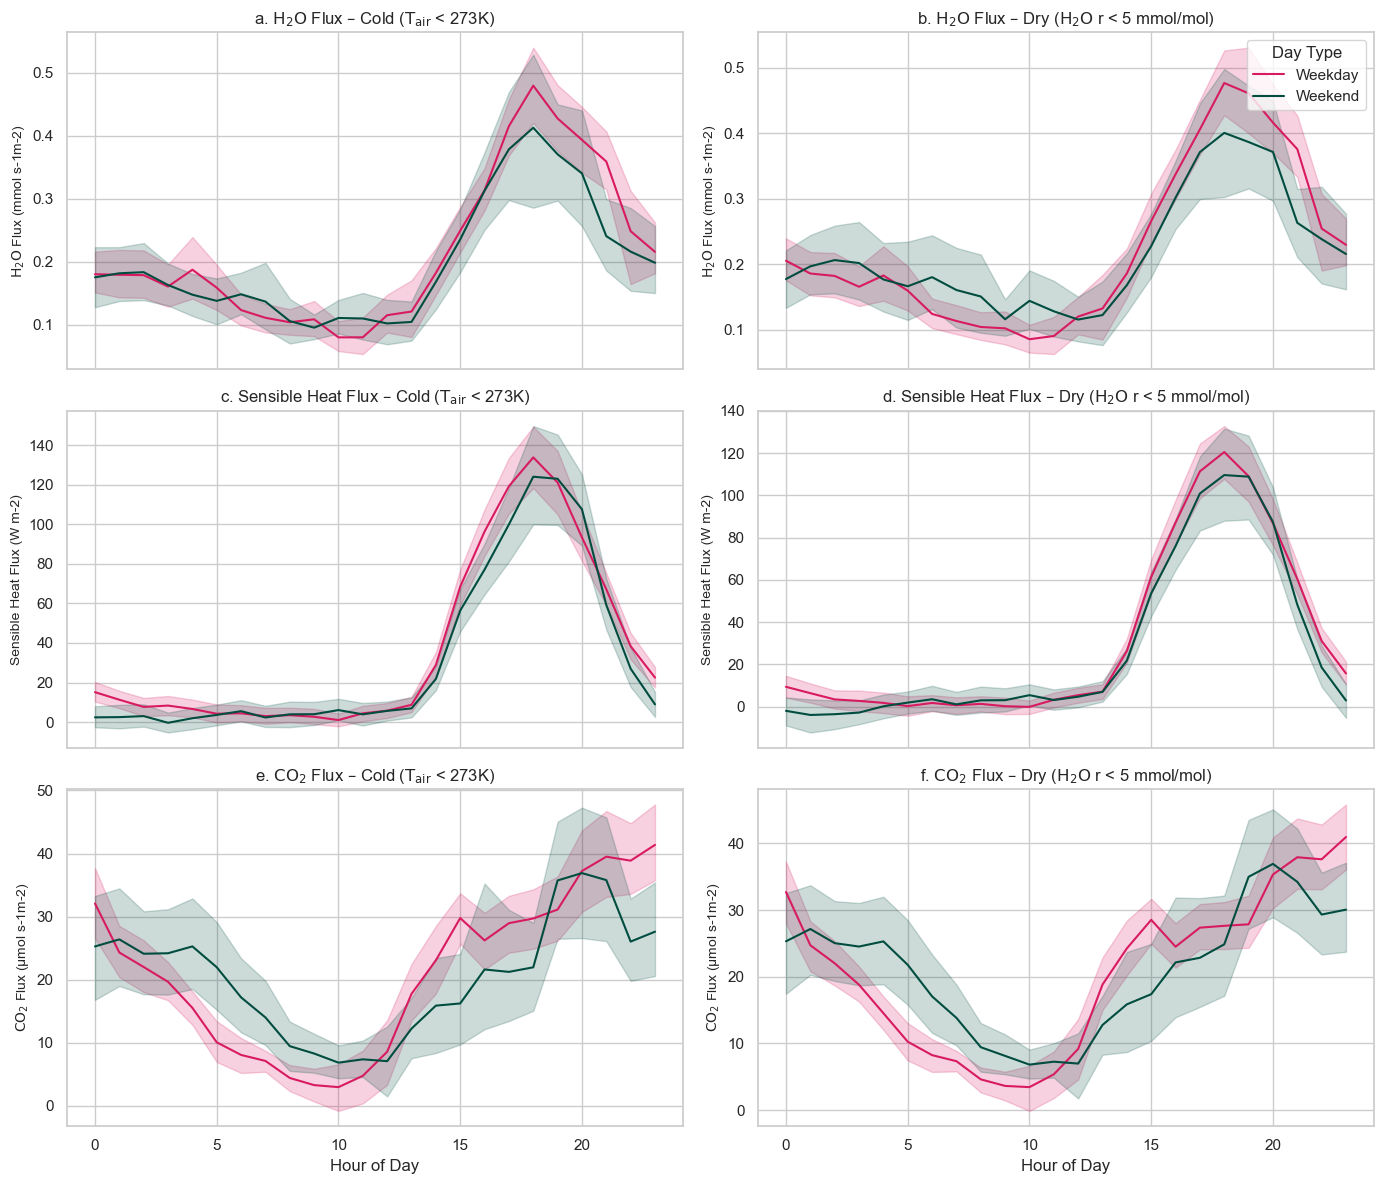

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare columns
df['season'] = 'Other'
df.loc[df['month'].isin([12, 1, 2]), 'season'] = 'Winter (DJF)'
df['day_type'] = df['is_weekend'].map({False: 'Weekday', True: 'Weekend'})

# Filter: Only DJF
df_winter = df[df['season'] == 'Winter (DJF)']

# Condition filters
df_cold = df_winter[df_winter['air_temperature'] < 273]
df_dry = df_winter[df_winter['h2o_mixing_ratio'] < 5]

# Variables and plot settings
flux_vars = ['h2o_flux', 'H', 'co2_flux']
titles = {
    'h2o_flux': r'$\mathrm{H_2O}$ Flux',
    'H': 'Sensible Heat Flux',
    'co2_flux': r'$\mathrm{CO_2}$ Flux'
}
units = {
    'h2o_flux': ds['h2o_flux'].attrs.get('units', ''),
    'H': ds['H'].attrs.get('units', ''),
    'co2_flux': ds['co2_flux'].attrs.get('units', '')
}

panel_labels = ['a.', 'b.', 'c.', 'd.', 'e.', 'f.']
col_titles = ['Cold ($\mathrm{T_{air}}$ < 273K)', 'Dry ($\mathrm{H_2O}$ r < 5 mmol/mol)']
filters = [df_cold, df_dry]

# Plotting
fig, axes = plt.subplots(nrows=len(flux_vars), ncols=2, figsize=(14, 12), sharex=True)

for row_idx, var in enumerate(flux_vars):
    for col_idx in range(2):
        ax = axes[row_idx, col_idx]
        filtered_df = filters[col_idx]
        
        for day_type, group_df in filtered_df.groupby('day_type'):
            sns.lineplot(
                data=group_df,
                x='hour',
                y=var,
                errorbar='ci',
                ax=ax,
                label=day_type,
                color=color_palette[day_type]
            )
        
        panel_idx = row_idx * 2 + col_idx
        ax.set_title(f"{panel_labels[panel_idx]} {titles[var]} – {col_titles[col_idx]}", fontsize=12)
        ax.set_xlabel('Hour of Day')
        ax.set_ylabel(f"{titles[var]} ({units[var]})", fontsize=10)
        ax.grid(True)
        
        if row_idx == 0 and col_idx == 1:
            ax.legend(title='Day Type', loc='upper right')
        else:
            ax.get_legend().remove()

plt.tight_layout()
plt.show()
